In [1]:
!pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount("/gdrive")

Mounted at /gdrive


In [3]:
from google.colab import files

In [ ]:
files.upload()

KeyboardInterrupt: 

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [5]:
%cd /content/kaggle.json

[Errno 2] No such file or directory: '/content/kaggle.json'
/content


In [6]:
!chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


### Download Dataset
 Download the Gujarati OCR dataset from Kaggle using the `kaggle` API. Ensure you have set up the Kaggle API token .


In [7]:

!kaggle datasets download -d ananddd/gujarati-ocr-typed-gujarati-characters

Dataset URL: https://www.kaggle.com/datasets/ananddd/gujarati-ocr-typed-gujarati-characters
License(s): CC-BY-NC-SA-4.0
 98% 121M/123M [00:01<00:00, 91.7MB/s] 
100% 123M/123M [00:01<00:00, 73.4MB/s]


### Unzip Dataset
Unzip the downloaded dataset, extracting the files to make them accessible for processing.

In [8]:
!unzip /content/gujarati-ocr-typed-gujarati-characters

Streaming output truncated to the last 5000 lines.
  inflating: TeraFont_Varun/TeraFont_Varun/TTEE/image_21022022_095231.PNG  
  inflating: TeraFont_Varun/TeraFont_Varun/TTEE/image_21022022_095232.PNG  
  inflating: TeraFont_Varun/TeraFont_Varun/TTEE/image_21022022_095233.PNG  
  inflating: TeraFont_Varun/TeraFont_Varun/TTEE/image_21022022_101711.PNG  
  inflating: TeraFont_Varun/TeraFont_Varun/TTEE/image_21022022_101712.PNG  
  inflating: TeraFont_Varun/TeraFont_Varun/TTEE/image_21022022_101713.PNG  
  inflating: TeraFont_Varun/TeraFont_Varun/TTEE/image_21022022_105534.PNG  
  inflating: TeraFont_Varun/TeraFont_Varun/TTEE/image_21022022_105535.PNG  
  inflating: TeraFont_Varun/TeraFont_Varun/TTEE/image_21022022_105536.PNG  
  inflating: TeraFont_Varun/TeraFont_Varun/TTEE/image_21022022_111236.PNG  
  inflating: TeraFont_Varun/TeraFont_Varun/TTEE/image_21022022_111237.PNG  
  inflating: TeraFont_Varun/TeraFont_Varun/TTEE/image_21022022_111238.PNG  
  inflating: TeraFont_Varun/TeraFont_

### Import Libraries
Import the necessary libraries:
- `os` for directory operations.
- `numpy` for numerical operations.
- `PIL.Image` for image processing.
- `train_test_split` and `OneHotEncoder` from `sklearn` for data preparation.
- `matplotlib.pyplot` for visualization.


In [9]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt


### Load and Preprocess Images
 Define a function to load images from a specified folder, convert them to grayscale, resize them to 28x28 pixels, and flatten the images into 1D arrays. Also normalizes the pixel values to be between 0 and 1 and one-hot encodes the labels.


In [10]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = Image.open(img_path).convert('L')  # Convert image to grayscale
                img = img.resize((28, 28))  # Resize image to 28x28
                img_array = np.array(img)
                images.append(img_array.flatten())  # Flatten the image
                labels.append(label)
    return np.array(images), np.array(labels)

# Load training and test datasets
X_train, y_train = load_images_from_folder('/content/Gujarati OCR/Gujarati/Train')
X_test, y_test = load_images_from_folder('/content/Gujarati OCR/Gujarati/Test')

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Dataset Information

 Display information about the dataset, including the total number of images, the dimensions of each image, and the unique label names.


In [11]:
total_images = len(X_train) + len(X_test)
unique_labels = np.unique(y_train)

print(f"Total image count: {total_images}")
print(f"Image dimensions: {X_train.shape[1]} (each image is 28x28 pixels)")
print(f"Label names: {unique_labels}")


Total image count: 76143
Image dimensions: 784 (each image is 28x28 pixels)
Label names: ['A' 'AA' 'Ai' 'Ala' 'Alaa' 'Alai' 'Alam' 'Alau' 'Ale' 'Alee' 'Ali' 'Alo'
 'Aloo' 'Alu' 'Am' 'Ana' 'Anaa' 'Anai' 'Anam' 'Anau' 'Ane' 'Anee' 'Ani'
 'Ano' 'Anoo' 'Anu' 'Au' 'Ba' 'Baa' 'Bai' 'Bam' 'Bau' 'Be' 'Bee' 'Bha'
 'Bhaa' 'Bhai' 'Bham' 'Bhau' 'Bhe' 'Bhee' 'Bhi' 'Bho' 'Bhoo' 'Bhu' 'Bi'
 'Bo' 'Boo' 'Bu' 'Cha' 'Chaa' 'Chai' 'Cham' 'Chau' 'Che' 'Chee' 'Chha'
 'Chhaa' 'Chhai' 'Chham' 'Chhau' 'Chhe' 'Chhee' 'Chhi' 'Chho' 'Chhoo'
 'Chhu' 'Chi' 'Cho' 'Choo' 'Chu' 'DDO' 'DDa' 'DDaa' 'DDai' 'DDam' 'DDau'
 'DDe' 'DDee' 'DDha' 'DDhaa' 'DDhai' 'DDham' 'DDhau' 'DDhe' 'DDhee' 'DDhi'
 'DDho' 'DDhoo' 'DDhu' 'DDi' 'DDoo' 'DDu' 'Da' 'Daa' 'Dai' 'Dam' 'Dau'
 'De' 'Dee' 'Dha' 'Dhaa' 'Dhai' 'Dham' 'Dhau' 'Dhe' 'Dhee' 'Dhi' 'Dho'
 'Dhoo' 'Dhu' 'Di' 'Do' 'Doo' 'Du' 'E' 'EE' 'Ga' 'Gaa' 'Gai' 'Gam' 'Gau'
 'Ge' 'Gee' 'Gha' 'Ghaa' 'Ghai' 'Gham' 'Ghau' 'Ghe' 'Ghee' 'Ghi' 'Gho'
 'Ghoo' 'Ghu' 'Gi' 'Gna' 'Gnaa' 'Gnai' 'Gnam' '

### Visualize
 Visualize a few examples from the dataset to give an idea of what the images and their corresponding labels look like. The images shown here are random and you can re-run to see different images each time!


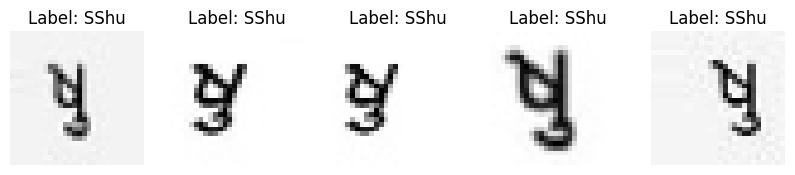

In [12]:
num_examples = 5
fig, axes = plt.subplots(1, num_examples, figsize=(10, 2))

for i in range(num_examples):
    img = X_train[i].reshape(28, 28)
    label = y_train[i]
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

plt.show()


### Initialize Parameters
Define the parameters of the neural network, including the input size, hidden layer sizes, and output size. Also initializes the weights and biases using Xavier initialization.


**Xavier Initialization**:
*Xavier Initialization* is a method used to initialize the weights of neural networks to keep the scale of the gradients roughly the same across all layers, preventing the gradients from vanishing or exploding. It sets the weights to values drawn from a distribution with a zero mean and a specific variance based on the number of input and output units in the network.

The Xavier Initialization formula looks like:


\begin{align*}
W1 & \sim \mathcal{N}\left(0, \sqrt{\frac{2}{n_{\text{input}} + n_{\text{hidden1}}}}\right) \\
W2 & \sim \mathcal{N}\left(0, \sqrt{\frac{2}{n_{\text{hidden1}} + n_{\text{hidden2}}}}\right) \\
W3 & \sim \mathcal{N}\left(0, \sqrt{\frac{2}{n_{\text{hidden2}} + n_{\text{output}}}}\right)
\end{align*}



In [13]:
input_size = X_train.shape[1]
hidden_size1 = 256  # number of neurons in the first hidden layer
hidden_size2 = 128  # a second hidden layer
output_size = y_train_encoded.shape[1]

def initialize_parameters():
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size1) * np.sqrt(2 / (input_size + hidden_size1))  # Xavier initialization
    b1 = np.zeros((1, hidden_size1))
    W2 = np.random.randn(hidden_size1, hidden_size2) * np.sqrt(2 / (hidden_size1 + hidden_size2))  # Xavier initialization
    b2 = np.zeros((1, hidden_size2))
    W3 = np.random.randn(hidden_size2, output_size) * np.sqrt(2 / (hidden_size2 + output_size))  # Xavier initialization
    b3 = np.zeros((1, output_size))
    return W1, b1, W2, b2, W3, b3


### Activation Functions
Define the activation functions used in the neural network: ReLU for hidden layers and softmax for the output layer.

The formulas for the Activation Functions are:

\begin{align*}
\text{ReLU}(Z) & = \max(0, Z) \\
\text{Softmax}(Z_i) & = \frac{e^{Z_i}}{\sum_{j} e^{Z_j}}
\end{align*}

In [14]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)


### Forward Propagation
 Define the forward propagation process, which computes the activations for each layer given the input data and the parameters.

 The formulas being coded in here are:

 \begin{align*}
Z1 & = X \cdot W1 + b1 \\
A1 & = \text{ReLU}(Z1) \\
Z2 & = A1 \cdot W2 + b2 \\
A2 & = \text{ReLU}(Z2) \\
Z3 & = A2 \cdot W3 + b3 \\
A3 & = \text{Softmax}(Z3)
\end{align*}


In [15]:
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3


### Parameter Initialization Verification
Initialize the parameters and prints their shapes to verify the correct initialization.


In [16]:
W1, b1, W2, b2, W3, b3 = initialize_parameters()

print(f"W1 shape: {W1.shape}")
print(f"b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}")
print(f"b2 shape: {b2.shape}")
print(f"W3 shape: {W3.shape}")
print(f"b3 shape: {b3.shape}")


W1 shape: (784, 256)
b1 shape: (1, 256)
W2 shape: (256, 128)
b2 shape: (1, 128)
W3 shape: (128, 385)
b3 shape: (1, 385)


### Compute Cost with L2 Regularization
Define the cost function, which includes the cross-entropy loss and an L2 regularization term to prevent overfitting.

The formula for L2 Regularization is:

\begin{align*}
\text{Cost} = \frac{1}{m} \sum_{i=1}^m \left( -\log(A3[\text{range}(m), \arg\max(Y, \text{axis}=1)]) \right) + \frac{\lambda}{2m} \left( \|W1\|^2 + \|W2\|^2 + \|W3\|^2 \right)
\end{align*}



In [17]:
def compute_cost(A3, Y, W1, W2, W3, lambd):
    m = Y.shape[0]
    logprobs = -np.log(A3[range(m), np.argmax(Y, axis=1)])
    cross_entropy_cost = np.sum(logprobs) / m

    L2_regularization_cost = (lambd / (2 * m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))

    cost = cross_entropy_cost + L2_regularization_cost
    return cost


### Backward Propagation with L2 Regularization
Define the backward propagation process, which computes the gradients of the cost function with respect to the parameters. Includes the L2 regularization term in the gradients.

The formulas being coded in here are:
\begin{align*}
dZ3 & = A3 - Y \\
dW3 & = \frac{1}{m} A2^T \cdot dZ3 + \frac{\lambda}{m} W3 \\
db3 & = \frac{1}{m} \sum dZ3 \\
dA2 & = dZ3 \cdot W3^T \\
dZ2 & = dA2 \cdot \text{ReLU}'(Z2) \\
dW2 & = \frac{1}{m} A1^T \cdot dZ2 + \frac{\lambda}{m} W2 \\
db2 & = \frac{1}{m} \sum dZ2 \\
dA1 & = dZ2 \cdot W2^T \\
dZ1 & = dA1 \cdot \text{ReLU}'(Z1) \\
dW1 & = \frac{1}{m} X^T \cdot dZ1 + \frac{\lambda}{m} W1 \\
db1 & = \frac{1}{m} \sum dZ1
\end{align*}


In [18]:
def backward_propagation(X, Y, Z1, A1, Z2, A2, Z3, A3, W2, W3):
    m = X.shape[0]

    dZ3 = A3 - Y
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2, dW3, db3



### Update Parameters
Updates the parameters using the computed gradients and a specified learning rate.


In [19]:
def update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    return W1, b1, W2, b2, W3, b3


### Mini-Batch Gradient Descent
Define the mini-batch gradient descent algorithm, which splits the data into mini-batches and iteratively updates the parameters to minimize the cost function.

# **The cost function**:
\begin{align*}
\text{Cost} & = \frac{1}{m} \sum_{i=1}^m \left( -\log(A3[\text{range}(m), \arg\max(Y, \text{axis}=1)]) \right) + \frac{\lambda}{2m} \left( \|W1\|^2 + \|W2\|^2 + \|W3\|^2 \right) \\
\end{align*}


In [28]:
def mini_batch_gradient_descent(X, Y, batch_size, learning_rate, epochs, lambd):
    W1, b1, W2, b2, W3, b3 = initialize_parameters()
    m = X.shape[0]
    cost_history = []

    for epoch in range(epochs):
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            Y_batch = Y_shuffled[i:i + batch_size]

            Z1, A1, Z2, A2, Z3, A3 = forward_propagation(X_batch, W1, b1, W2, b2, W3, b3)
            cost = compute_cost(A3, Y_batch, W1, W2, W3, lambd)
            dW1, db1, dW2, db2, dW3, db3 = backward_propagation(X_batch, Y_batch, Z1, A1, Z2, A2, Z3, A3, W2, W3)
            dW1 += (lambd / m) * W1
            dW2 += (lambd / m) * W2
            dW3 += (lambd / m) * W3
            W1, b1, W2, b2, W3, b3 = update_parameters(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, learning_rate)

        cost_history.append(cost)
        if (epoch % 10000 == 0) or (epoch == epochs):
            print(f"Cost after epoch {epoch}: {cost}")

    return W1, b1, W2, b2, W3, b3, cost_history



# **Training the Model**
 Set the hyperparameters (learning rate, batch size, epochs, and regularization parameter) and trains the neural network using mini-batch gradient descent.


In [29]:
learning_rate = 0.001
batch_size = 100 #64
epochs = 100000
lambd = 0.01  # Regularization parameter

W1, b1, W2, b2, W3, b3, cost_history = mini_batch_gradient_descent(X_train, y_train_encoded, batch_size, learning_rate, epochs, lambd)


Cost after epoch 0: 6.041253502574638


KeyboardInterrupt: 

### Model Evaluation
This cell calculates and prints the training and test accuracies of the trained neural network model.

In [30]:
#Calculate and print the training and test accuracies
def predict(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_propagation(X, W1, b1, W2, b2, W3, b3)
    return np.argmax(A3, axis=1)

def compute_accuracy(predictions, labels):
    return np.mean(predictions == labels)

train_predictions = predict(X_train, W1, b1, W2, b2, W3, b3)
test_predictions = predict(X_test, W1, b1, W2, b2, W3, b3)

train_accuracy = compute_accuracy(train_predictions, np.argmax(y_train_encoded, axis=1))
test_accuracy = compute_accuracy(test_predictions, np.argmax(y_test_encoded, axis=1))

print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

Training accuracy: 83.88%
Test accuracy: 68.86%


### Cost Reduction Visualization
This cell plots the cost reduction over epochs during training, which helps in visualizing the training progress and convergence.


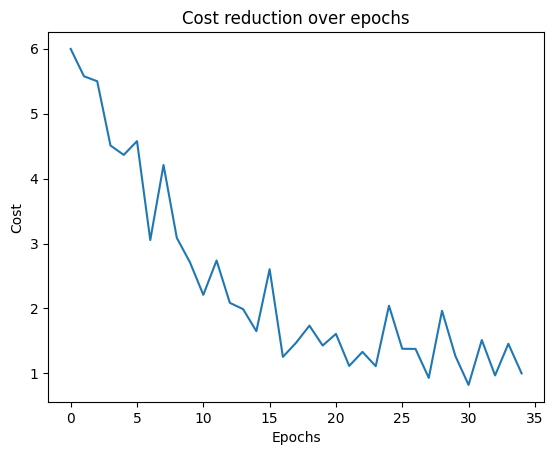

In [31]:
#  Plot the cost reduction over epochs
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost reduction over epochs')
plt.show()


### Save Model
This cell defines a function to save the trained model parameters into a file using pickle serialization.

In [32]:
#  Save the trained model parameters using pickle
import pickle

def save_model_parameters(W1, b1, W2, b2, W3, b3, filename='model_parameters.pkl'):
    with open(filename, 'wb') as f:
        pickle.dump((W1, b1, W2, b2, W3, b3), f)
    print(f"Model parameters saved to {filename}")

save_model_parameters(W1, b1, W2, b2, W3, b3)


Model parameters saved to model_parameters.pkl


### Load Model
Define a function to load the saved model parameters from a file using pickle deserialization.


In [33]:
 #Load the saved model parameters using pickle
def load_model_parameters(filename='model_parameters.pkl'):
    with open(filename, 'rb') as f:
        W1, b1, W2, b2, W3, b3 = pickle.load(f)
    print(f"Model parameters loaded from {filename}")
    return W1, b1, W2, b2, W3, b3

W1, b1, W2, b2, W3, b3 = load_model_parameters()


Model parameters loaded from model_parameters.pkl


### Visualize Predictions
Define a function to visualize predictions made by the trained model on a given set of images.


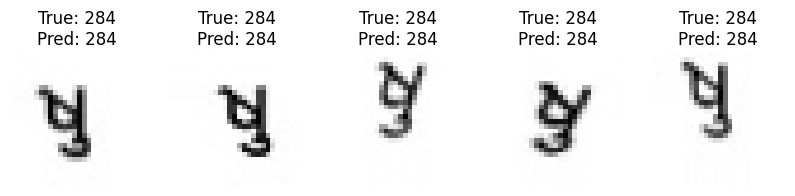

In [34]:
# Define a function to visualize predictions
def visualize_predictions(X, y, W1, b1, W2, b2, W3, b3, num_examples=5):
    predictions = predict(X, W1, b1, W2, b2, W3, b3)
    fig, axes = plt.subplots(1, num_examples, figsize=(10, 2))

    for i in range(num_examples):
        img = X[i].reshape(28, 28)
        label = y[i]
        predicted_label = predictions[i]
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'True: {label}\nPred: {predicted_label}')
        axes[i].axis('off')

    plt.show()

visualize_predictions(X_test, np.argmax(y_test_encoded, axis=1), W1, b1, W2, b2, W3, b3)


### Handle Edge Cases
Define a function to handle edge cases where an error might occur during model evaluation.

In [35]:
#  Handle edge cases during model evaluation
def evaluate_model(X, y, W1, b1, W2, b2, W3, b3):
    try:
        predictions = predict(X, W1, b1, W2, b2, W3, b3)
        accuracy = compute_accuracy(predictions, y)
        print(f"Model accuracy: {accuracy * 100:.2f}%")
    except Exception as e:
        print(f"An error occurred during model evaluation: {e}")

evaluate_model(X_test, np.argmax(y_test_encoded, axis=1), W1, b1, W2, b2, W3, b3)


Model accuracy: 68.86%


### Confusion Matrix Plotting
Define a function to plot the confusion matrix, which helps in visualizing the performance of the model across different classes.

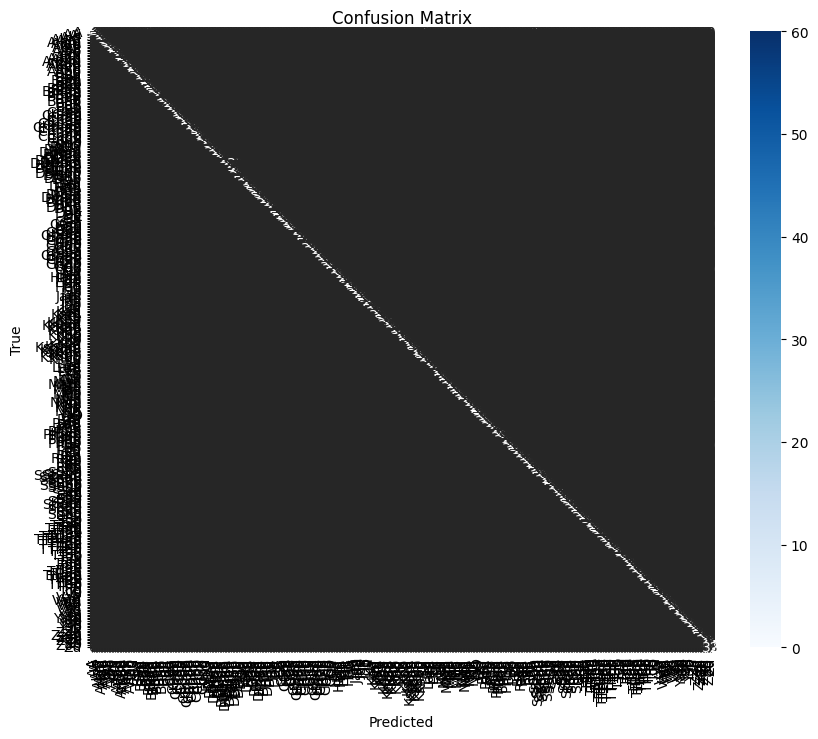

In [36]:
#  Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(np.argmax(y_test_encoded, axis=1), test_predictions, encoder.categories_[0])
